In [1]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from IPython.display import display_markdown
import matplotlib.pyplot as plt
from xray_fov.nn.defaults.hyperparameters import hyperparameters as hp
from xray_fov.nn.defaults.loaders import Loaders
from xray_fov.nn.models.utils import create_loaders
from xray_fov.nn.defaults.models import model, optimizer
from xray_fov.nn.defaults.train import train
from xray_fov.paths import paths, outs
from xray_fov.data.dicom import dicom_directory
from xray_fov.nn.models.utils import create_model_from_hash, create_loaders_from_hash, load_model
from xray_fov.nn.metrics import check_accuracy
import os

In [3]:
dicoms = dicom_directory(paths["dicom"]["phantom-alex"], caching=False)
reference_path = os.path.join(paths["dicom"]["phantom-alex"], dicoms[0]["file_path"])

sim_muas_list = [0.01,0.1,1,10]
eln_var_list = [0,100,1000,10000,100000]

metrics = []
for sim_muas in sim_muas_list:
    metrics_single = []
    for eln_var in eln_var_list:
        display_markdown(f"# sim_muas: {sim_muas} | eln_var: {eln_var}", raw=True)
        ldrs = Loaders(*create_loaders(
                paths["nn"], "thinned", sim_muas=sim_muas, eln_var=eln_var,
                num_workers=hp.data.num_workers, pin_memory=hp.data.pin_memory, batch_size=hp.data.batch_size ))    
        mdl = model("monai", outs["models"], ldrs, hp)
        opt = optimizer("adam", mdl, outs["models"], hp.optimizer)

        print(mdl.hash)
        
        try:
            net = create_model_from_hash(mdl.hash, outs["models"]).to(hp.training.device)
            load_model(net, mdl.hash, outs["models"])
            train_loader, test_loader, validation_loader = create_loaders_from_hash(mdl.hash, outs["models"], batch_size=1)
        except:
            train(outs["models"], hp.training, ldrs, mdl, opt)
            net = create_model_from_hash(mdl.hash, outs["models"]).to(hp.training.device)
            load_model(net, mdl.hash, outs["models"])
            train_loader, test_loader, validation_loader = create_loaders_from_hash(mdl.hash, outs["models"], batch_size=1)

        metrics_single += [check_accuracy(-1, test_loader, net, device=hp.training.device)]
    metrics += [metrics_single]

# sim_muas: 0.01 | eln_var: 0

49bcf0b94a86c3db


/home/maximilianglumann/master-thesis/venvs/ma/lib/python3.14/site-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
  warn_deprecated(argname, msg, warning_category)


Epoch: -1, Acc: 0.90, and Dice score: 0.68, IoU: 0.72, hd: 27.63


# sim_muas: 0.01 | eln_var: 100

43d8bc16d4c6ca8b
Epoch: -1, Acc: 0.90, and Dice score: 0.66, IoU: 0.72, hd: 27.53


# sim_muas: 0.01 | eln_var: 1000

6d3b230494a1b28a
Epoch: -1, Acc: 0.90, and Dice score: 0.66, IoU: 0.76, hd: 27.35


# sim_muas: 0.01 | eln_var: 10000

500f0f222405f11a
Epoch: -1, Acc: 0.86, and Dice score: 0.40, IoU: 0.49, hd: 29.30


# sim_muas: 0.01 | eln_var: 100000

503fd49570ab76b8
Epoch: -1, Acc: 0.84, and Dice score: 0.02, IoU: 0.05, hd: 48.04


# sim_muas: 0.1 | eln_var: 0

4ae4cbdac8a76515
Epoch: -1, Acc: 0.95, and Dice score: 0.85, IoU: 0.84, hd: 20.58


# sim_muas: 0.1 | eln_var: 100

45443ff235940c47
Epoch: -1, Acc: 0.95, and Dice score: 0.85, IoU: 0.82, hd: 19.87


# sim_muas: 0.1 | eln_var: 1000

a7fd286ee2520f4f
Epoch: -1, Acc: 0.95, and Dice score: 0.82, IoU: 0.81, hd: 21.69


# sim_muas: 0.1 | eln_var: 10000

373b825b51665724
Epoch: -1, Acc: 0.91, and Dice score: 0.72, IoU: 0.77, hd: 25.49


# sim_muas: 0.1 | eln_var: 100000

777ef6aa3218705e
Epoch: -1, Acc: 0.86, and Dice score: 0.45, IoU: 0.60, hd: 29.35


# sim_muas: 1 | eln_var: 0

3e42b2c4d034daa0
Epoch: -1, Acc: 0.97, and Dice score: 0.91, IoU: 0.91, hd: 15.04


# sim_muas: 1 | eln_var: 100

3e691bc10624a09a
Epoch: -1, Acc: 0.97, and Dice score: 0.91, IoU: 0.89, hd: 16.11


# sim_muas: 1 | eln_var: 1000

e45c26240330ca00
Epoch: -1, Acc: 0.97, and Dice score: 0.91, IoU: 0.89, hd: 16.01


# sim_muas: 1 | eln_var: 10000

7c4781ff6949a087
Epoch: -1, Acc: 0.96, and Dice score: 0.86, IoU: 0.84, hd: 18.83


# sim_muas: 1 | eln_var: 100000

779bf249b21f4389
Epoch: -1, Acc: 0.92, and Dice score: 0.72, IoU: 0.77, hd: 24.69


# sim_muas: 10 | eln_var: 0

f8a55950c9b14b8b
Epoch: -1, Acc: 0.98, and Dice score: 0.93, IoU: 0.93, hd: 12.86


# sim_muas: 10 | eln_var: 100

2893b6101abd8ffd
Epoch: -1, Acc: 0.98, and Dice score: 0.93, IoU: 0.92, hd: 13.01


# sim_muas: 10 | eln_var: 1000

efac0601b780f6e5
Epoch: -1, Acc: 0.98, and Dice score: 0.93, IoU: 0.92, hd: 12.91


# sim_muas: 10 | eln_var: 10000

1dd6758b3ab1752e
Epoch: -1, Acc: 0.97, and Dice score: 0.92, IoU: 0.91, hd: 16.26


# sim_muas: 10 | eln_var: 100000

0a19237836dfbca4
Epoch: -1, Acc: 0.96, and Dice score: 0.86, IoU: 0.84, hd: 17.74


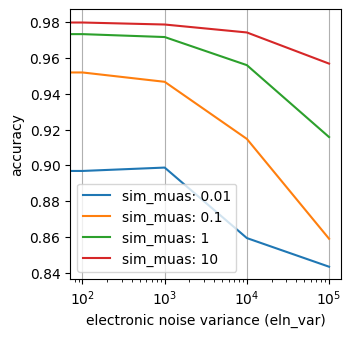

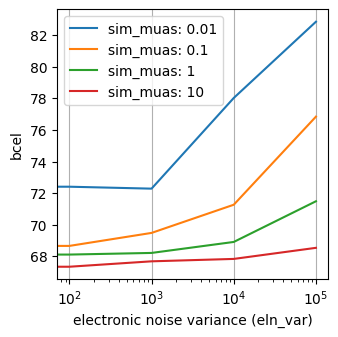

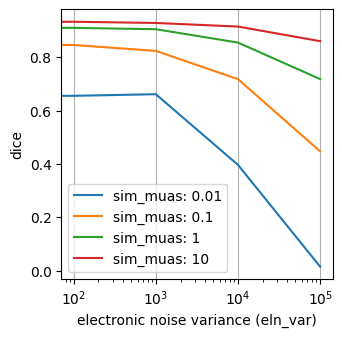

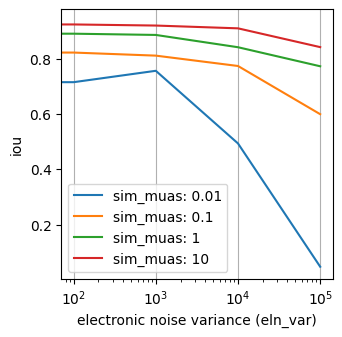

In [4]:
for kind in ["accuracy", "bcel", "dice", "iou"]:
    fig, axe = plt.subplots(figsize=(3.5,3.5))
    for sim_muas, metric in zip(sim_muas_list, metrics):
        axe.semilogx(eln_var_list, [m[kind] for m in metric], label=(f"sim_muas: {sim_muas}"))
        axe.set_xlabel("electronic noise variance (eln_var)")
        axe.set_ylabel(kind)
        axe.grid(True, axis='x')
    axe.legend()
    fig.savefig(outs["nn-thinning-eval"]+f"/{kind}.svg")
    fig.savefig(outs["nn-thinning-eval"]+f"/{kind}.jpg")
    plt.show()